 # BOOMBIKES assignment of ML

# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.



# Steps for Model Building
1.Reading and Understanding Data

2.Visualising the Data

3.Data Preparation

4.Splitting the Data into Training and Testing Sets

5.Feature Scaling

6.Building the Model

7.Residual Analysis of the train data

8.Making predictions using final model

9.Model Evaluation

# Importing Relevent Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Reading and Understanding the data

In [2]:
#storing the data in 'bike' variable
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking the total rows and columns
bike.shape


(730, 16)

In [4]:
#cheking the missing values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<b>Observation : There is no missing values<b>

In [5]:
#getting know about the data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#  Visualising the Data once

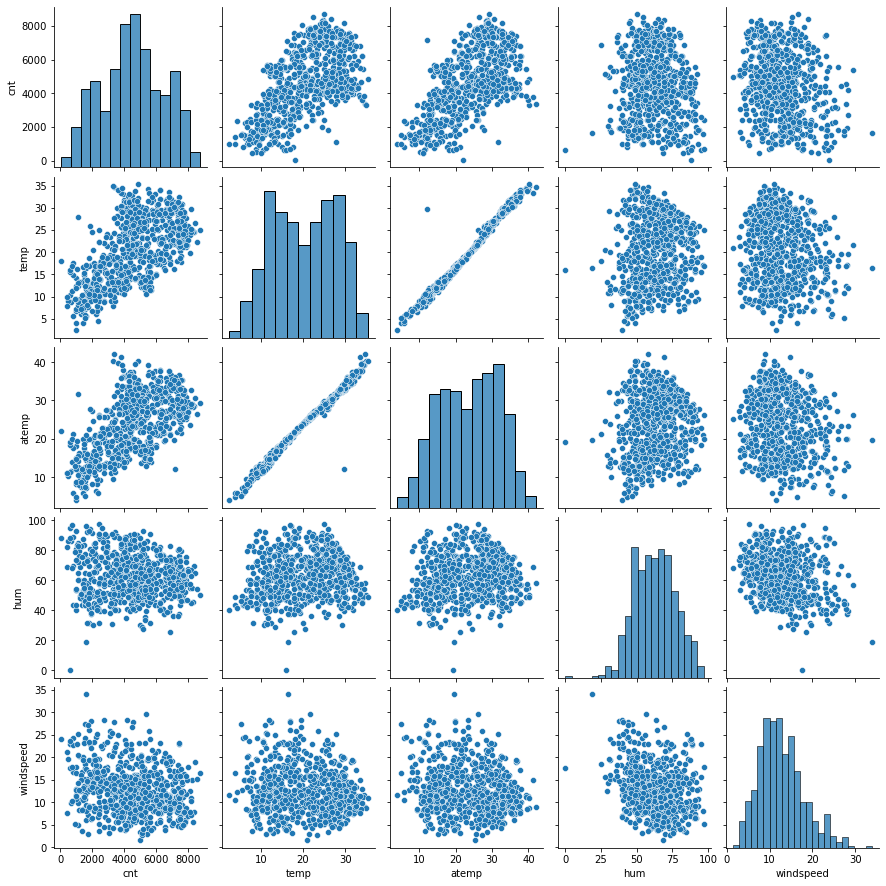

In [6]:
#visualising the data
sns.pairplot(data = bike, vars =['cnt','temp', 'atemp', 'hum', 'windspeed'])
plt.show()

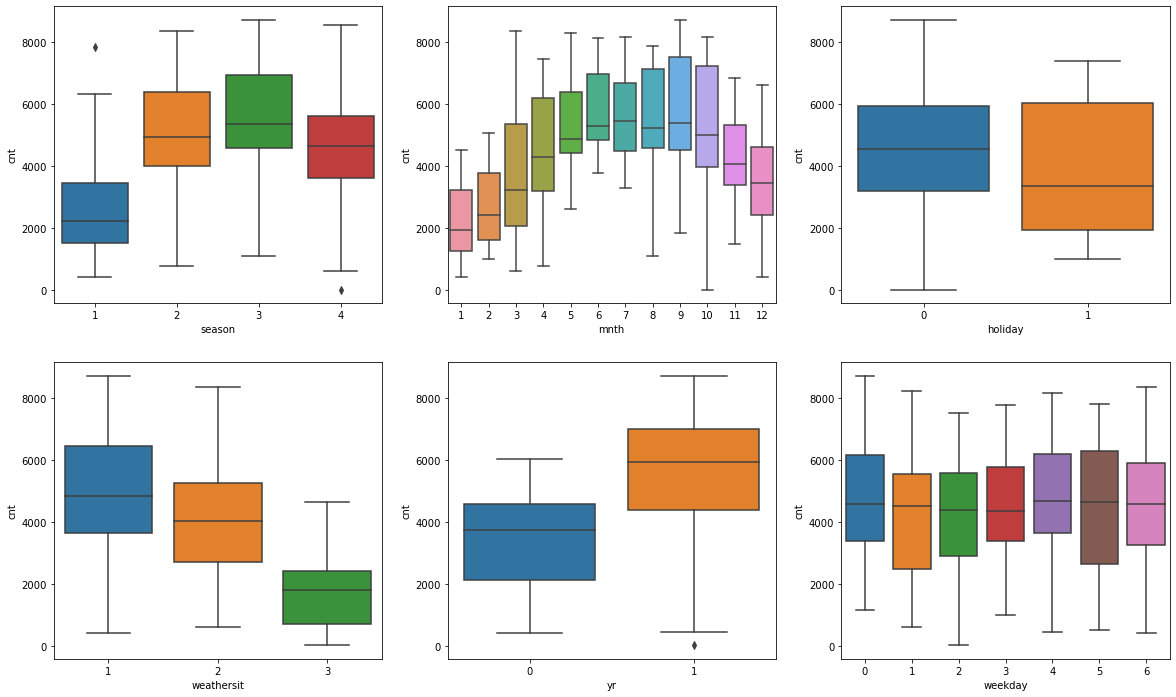

In [7]:
# categorical visualising
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

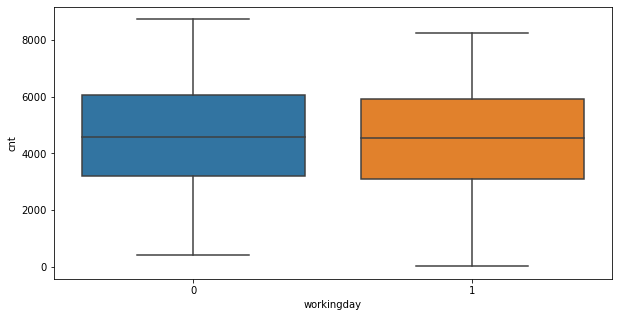

In [8]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

# Observation of plots

1. Number of sharing the bikes is least in Spring and highest in Summer.

2. Number of sharing the bikes was increased in 2019.



# In our bikes dataset , we have the following types of columns
<b>Categorical columns: <i>season , month , weathersit , weekday.

 Continuous/Numerical columns : <i>windspeed , hum , temp , atemp , count.
    
Binary/Dichotomous columns:<i> yr , holiday , workingday.<b>

# We have a few unecessary columns, need to be dropped

In [9]:
#deleting the four variables 
bike = bike.drop(["instant","casual","registered","dteday"], axis=1)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# We can change the names of variables for better reading

In [11]:
#Renaming the some variables for more clearity

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Changing the labels of categorical variables

Mapping the Categorical columns to their actual category names :

 Season column mapping as:
 
1. spring

2. summer

3. fall

4. winter

In [12]:
#mapping season
bike.season = bike.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall' ,4: 'Winter'})

Weathersit column mapping as:

1. Clear

2. Mist & Cloudy

3. Light Snow & Rain

4. Heavy Snow & Rain

In [13]:
#mapping weathersit

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

Weekday column mapping as:

0. Sunday
1. Monday
2. Tuesday
3. Wednesday
4. Thursday
5. Friday
6. Saturday

In [14]:
#mapping weekday
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [15]:
#changing the month into names
import calendar
bike['month'] = bike['month'].apply(lambda x: calendar.month_abbr[x])

In [16]:
bike.head(5)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Dummy variables 

In [17]:
#Creating the dummy variable
dummy = bike[['season','month','weekday', 'weathersit']]

In [18]:
#Deleting the variables
dummy = pd.get_dummies(dummy, drop_first=True)

#adding the dummy variable to main data
bike = pd.concat([dummy, bike], axis=1)
bike.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bike.shape

(730, 34)

In [20]:
# Now need to drop the columns for dummy columns were created

bike.drop(['season','month','weekday', 'weathersit'], axis =1, inplace = True)
bike.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike.shape

(730, 30)

# Oservation: Now we have 30 columns to work on it

# Splitting the data into Training and Testing Sets

In [22]:
# now need to splitting the data into training and testing sets
train, test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
print(train.shape)
print(test.shape)

(510, 30)
(219, 30)


In [24]:
bike.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


# Rescaling the Features

 Min-Max scaling

In [25]:
scaler = MinMaxScaler()

In [26]:
# Creating the variables for all the numeric columns
num_vars = ['count', 'humidity','temp','atemp','windspeed']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [27]:
train.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [28]:
train.describe()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Through the Heatmap, need to check correlation of variables

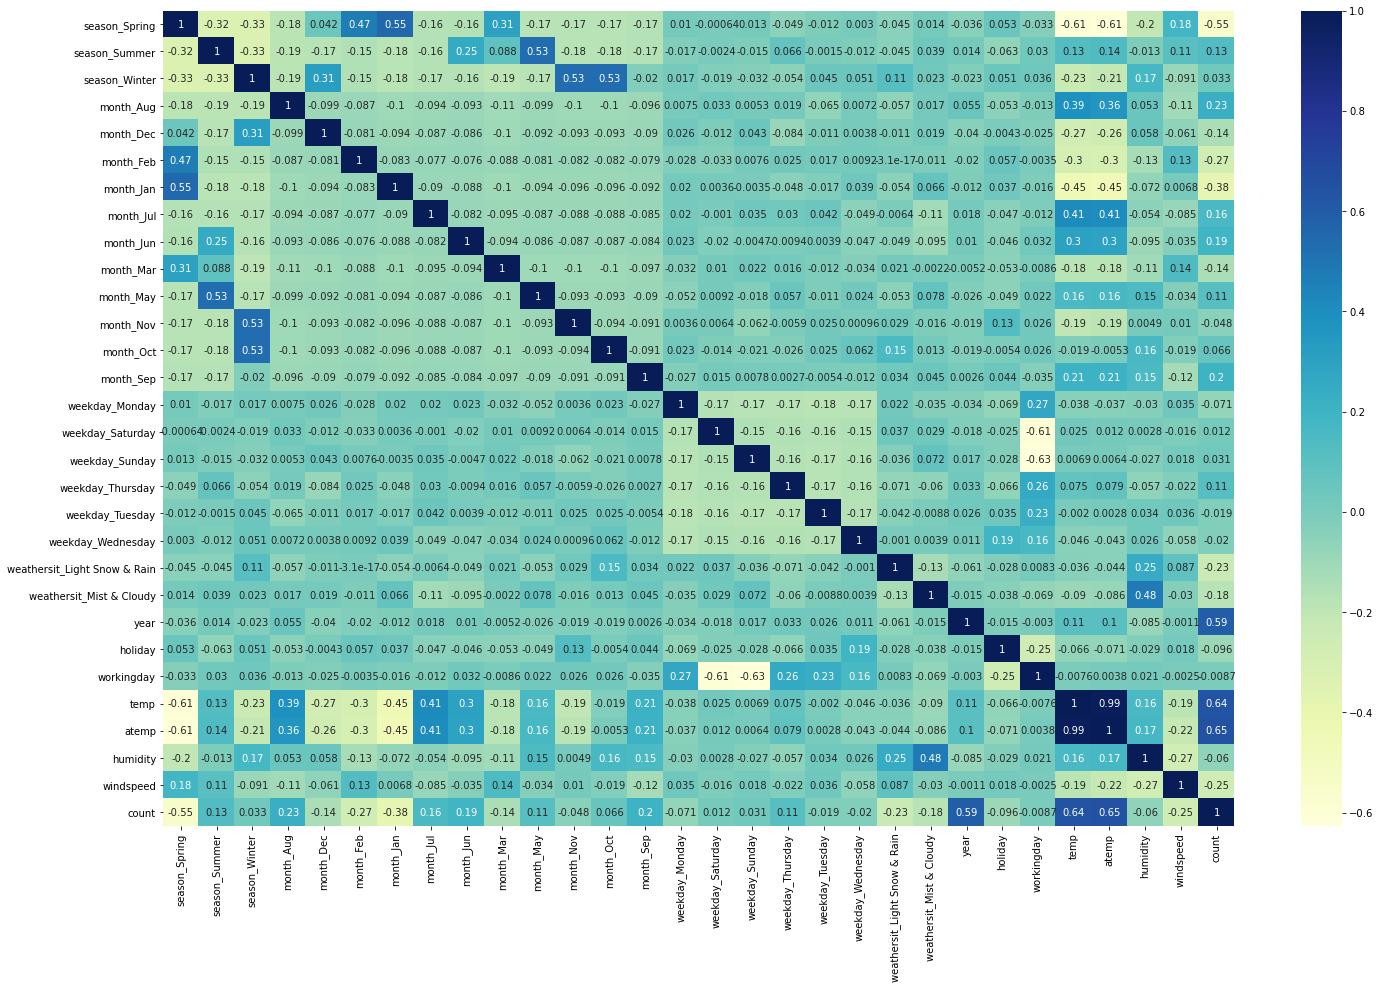

In [29]:
plt.figure(figsize= (24,15))
sns.heatmap(train.corr(), annot = True, cmap= 'YlGnBu')
plt.show()

# Observation : we see here temp and atemp are highly correlated, now need to drop one  of them

In [30]:
bike.drop('atemp', axis=1, inplace=True)
bike.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


## Diving into X anf y sets for the model building



In [31]:
# As we see here in the data count is a target variable 
y_train = train.pop('count')
X_train = train

# Building a linear model

<b>Fit a regression line through the training data using statsmodels.In statsmodels, you need to explicitly fit a constant using sm.add_constant(X),because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.



In [32]:
lr = LinearRegression()

lr.fit(X_train, y_train)

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 14),
 ('month_Mar', False, 15),
 ('month_May', False, 7),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'month_Dec',
       'month_Jan', 'month_Jul', 'month_Nov', 'month_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'year',
       'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Feb', 'month_Jun', 'month_Mar', 'month_May',
       'month_Oct', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

# Model 1

In [36]:
#Creating the variable with RFE selected columns
X_train_rfe = X_train[col]

In [37]:
# Adding the constant to the train
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
# Running the fitted model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [39]:
# Need to check the parameter obtained
lm.params

const                           0.320243
season_Spring                  -0.061737
season_Summer                   0.040767
season_Winter                   0.103435
month_Dec                      -0.037199
month_Jan                      -0.043748
month_Jul                      -0.055495
month_Nov                      -0.040949
month_Sep                       0.074891
weathersit_Light Snow & Rain   -0.248116
weathersit_Mist & Cloudy       -0.055876
year                            0.230328
holiday                        -0.091228
temp                            0.479977
humidity                       -0.160227
windspeed                      -0.188457
dtype: float64

In [40]:
# Here, we need to check the summary of linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.34e-189
Time:                        18:32:27   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3202      0.036      8.886      0.000       0.249       0.391
season_Spring                   -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                    0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                    0.1034      0.018      5.763      0.000       0.068       0.139
month_Dec                       -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                       -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                       -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                       -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                        0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light Snow & Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist & Cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
year                             0.2303      0.008     28.511      0.000       0.214       0.246
holiday                         -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                             0.4800      0.037     12.977      0.000       0.407       0.553
humidity                        -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                       -0.1885      0.026     -7.312      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation

1. p-value is not greater than _<0.5.
2. R-squre and Adj. r-squared are around .84, which should be around .80a nd .81 respectively.

We still can't decide which variable should be dropped out, now we need check the VIF value

In [41]:
#Checking the VIF value
vif = pd.DataFrame()
vif['features']= X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,82.48
1,season_Spring,5.27
13,temp,4.42
3,season_Winter,3.83
2,season_Summer,2.76
14,humidity,1.93
7,month_Nov,1.76
5,month_Jan,1.68
10,weathersit_Mist & Cloudy,1.57
4,month_Dec,1.49


## The contant has the highest VIF value, need to drop it and check again which other variable has the high VIF value

In [42]:
#Dropping the contant variable
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [43]:
# Checking the VIF value without constant variable
vif = pd.DataFrame()
vif['features']= X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
13,humidity,30.94
12,temp,17.80
14,windspeed,4.72
0,season_Spring,4.37
2,season_Winter,4.06
1,season_Summer,2.81
9,weathersit_Mist & Cloudy,2.32
10,year,2.09
6,month_Nov,1.83
4,month_Jan,1.75


# Observation 

## Humidity has the highest VIF value, need to drop from the model




# Model 2

## model 2 without humidity variable

In [44]:
#Dropping the humidity variable
X_train1= X_train_rfe.drop(['humidity'], axis = 1)


In [45]:
# Adding the new constant variable
X_train_lm = sm.add_constant(X_train1)

In [46]:
#Building the model to fit
lm = sm.OLS(y_train, X_train_lm).fit()

In [47]:
# now lets check the summary again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.57e-186
Time:                        18:32:27   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Here, we are checking the VIF value again after dropping humidity variable

In [48]:
vif = pd.DataFrame()
vif['features']= X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [49]:
vif

,features,VIF
0,const,63.34
1,season_Spring,5.21
13,temp,4.10
3,season_Winter,3.68
2,season_Summer,2.73
7,month_Nov,1.75
5,month_Jan,1.67
4,month_Dec,1.48
6,month_Jul,1.48
8,month_Sep,1.33


# Observation

## here we see constant has the higest VIF value, here we need to check again

In [50]:
vif = pd.DataFrame()
vif['features']= X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,63.34
1,season_Spring,5.21
13,temp,4.10
3,season_Winter,3.68
2,season_Summer,2.73
7,month_Nov,1.75
5,month_Jan,1.67
4,month_Dec,1.48
6,month_Jul,1.48
8,month_Sep,1.33


## Here, we see there is no problem as we do not have high VIF value





# Residual Analysis for train data

In [51]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

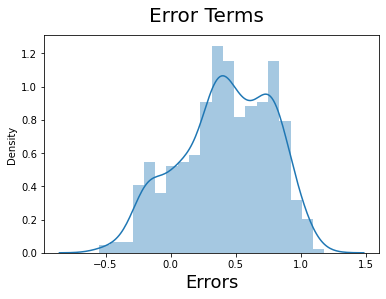

In [52]:
#Building the histoplot to check error distribution
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

# Making the  Prediction on the model


appling the scaling on the test sets

In [53]:
num_vars = ['count', 'humidity','temp', 'atemp','windspeed']
test[num_vars] = scaler.transform(test[num_vars])


In [54]:
test.describe()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


# Diving into y_test and X_test

In [55]:
y_test = test.pop('count')
X_test = test


In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 219 non-null    uint8  
 1   season_Summer                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   month_Aug                     219 non-null    uint8  
 4   month_Dec                     219 non-null    uint8  
 5   month_Feb                     219 non-null    uint8  
 6   month_Jan                     219 non-null    uint8  
 7   month_Jul                     219 non-null    uint8  
 8   month_Jun                     219 non-null    uint8  
 9   month_Mar                     219 non-null    uint8  
 10  month_May                     219 non-null    uint8  
 11  month_Nov                     219 non-null    uint8  
 12  month_Oct                     219 non-null    uint8  
 13  mont

In [57]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   month_Dec                     219 non-null    uint8  
 5   month_Jan                     219 non-null    uint8  
 6   month_Jul                     219 non-null    uint8  
 7   month_Nov                     219 non-null    uint8  
 8   month_Sep                     219 non-null    uint8  
 9   weathersit_Light Snow & Rain  219 non-null    uint8  
 10  weathersit_Mist & Cloudy      219 non-null    uint8  
 11  year                          219 non-null    int64  
 12  holiday                       219 non-null    int64  
 13  temp

In [58]:
# making prediction by using the second model
y_pred = lm.predict(X_test)


In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8132736736429254

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.008868717773262813

## Evaluating the model

Text(0, 0.5, 'y_pred')

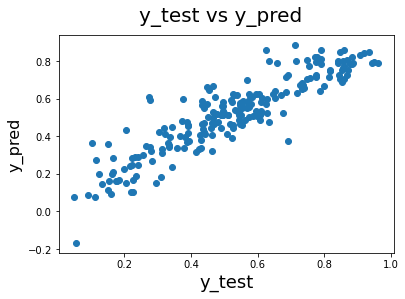

In [61]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# As we see data is normally spread out.

In [62]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.437655
0,const,0.246635
11,year,0.234287
3,season_Winter,0.088652
8,month_Sep,0.068219
2,season_Summer,0.033271
7,month_Nov,-0.041852
4,month_Dec,-0.044529
5,month_Jan,-0.050270


# we have teh best fitted line

count = 0.246635 + temp X 0.437655 + year X 0.234287 + season_Winter X 0.088652 + season_Summer X 0.033271 + month_Sep X 0.068219 - month_Nov X 0.041852 - month_Dec X 0.044529 - month_Jan X 0.050270 - month_Jul X 0.050376 - season_Spring	X 0.071640 - weathersit_Mist & Cloudy X 0.081442 - holiday X 0.091915 - windspeed X 0.158596 - weathersit_Light Snow & Rain	X 0.292892






1. Temp is the most significant with the largest coefficient.
2. Followed by weathersit_Light Snow & Rain.
3. Bike rentals is more for the month of september
4. The rentals reduce during holidays